In [100]:
import math
import cmath
import matplotlib.pyplot as plt
import random
import numpy as np

In [101]:
n = 11
N = 32
dw = math.pi * 0.1
T = 1

In [102]:
# Генерация коэффициентов косинусоид
def generate():
  w = [dw * i for i in range(n)]
  A = list(range(1, n + 1))
  random.shuffle(A)
  phi = [random.uniform(0, 0.5) for _ in range(n)]
  return w, A, phi

w, A, phi = generate()
print(f'''
  w = {w}
  A = {A}
  phi = {phi}
''')


  w = [0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
  A = [4, 10, 3, 2, 1, 8, 5, 7, 9, 11, 6]
  phi = [0.35240445517296004, 0.021266822141698116, 0.21842018609651598, 0.16384189121110276, 0.21891707186599613, 0.2290984477569325, 0.3695507224030441, 0.14922383298396075, 0.03690022753687061, 0.33093623331877586, 0.08223348678127973]



In [103]:
# Сгенерированные коэффициенты

w = [0.0, 0.3141592653589793, 0.6283185307179586, 0.9424777960769379, 1.2566370614359172, 1.5707963267948966, 1.8849555921538759, 2.199114857512855, 2.5132741228718345, 2.827433388230814, 3.141592653589793]
A = [2, 1, 8, 5, 10, 7, 6, 11, 3, 9, 4]
phi = [0.33785569669357485, 0.23248647684059848, 0.3917624429955529, 0.057993767165982035, 0.4247444506665633, 0.454128256896334, 0.3996500754750942, 0.22441622269575007, 0.0792848793029533, 0.10232991229754218, 0.27385006680932694]

In [104]:
# Сигнал

def s(t):
  return sum([A[i] * math.cos(w[i]*t + phi[i]) for i in range(n)])

In [105]:
# Дискретные отсчёты
Xn = list(range(N))
# Отсчёты для графика аналогового сигнала
X = [i * N / (2**12) for i in range(2**12)]

S = [s(x) for x in Xn]

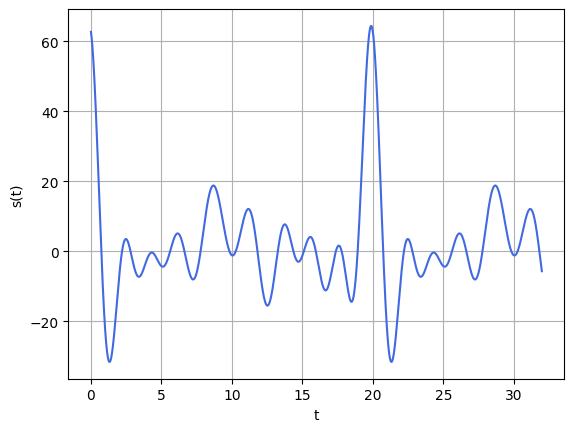

In [106]:
# Аналоговый сигнал
plt.plot(X, [s(x) for x in X], color='royalblue')

plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid()
plt.show()
!

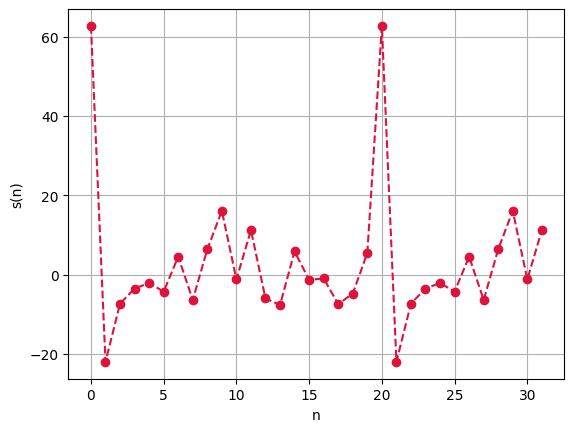

In [107]:
# Дискретизированный сигнал
plt.plot(Xn, S, 'o--', color='crimson')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.show()
!

In [108]:
# Преобразование фурье для исходного сигнала

W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S, norm='forward')[:N // 2] * 2

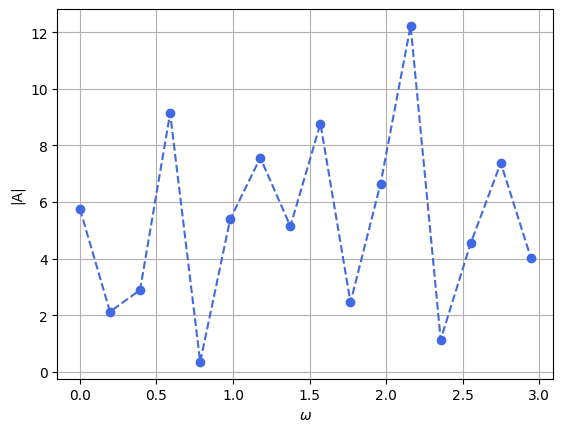

In [109]:
# Спектр исходного сигнала
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.show()
!

In [110]:
# Линейное сглаживание по 5 точкам
def L_5(S):
  y = []
  for i in range(2, N - 2):
    y.append((S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2]) / 5)
  return ([0] * 2) + y + ([0] * 2)

# Линейное сглаживание по 9 точкам
def L_9(S):
  y = []
  for i in range(4, N - 4):
    y.append((S[i-4] + S[i-3] + S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2] + S[i+3] + S[i+4]) / 9)
  return ([0] * 4) + y + ([0] * 4)

In [111]:
Y_L_5 = L_5(S)
Y_L_9 = L_9(S)

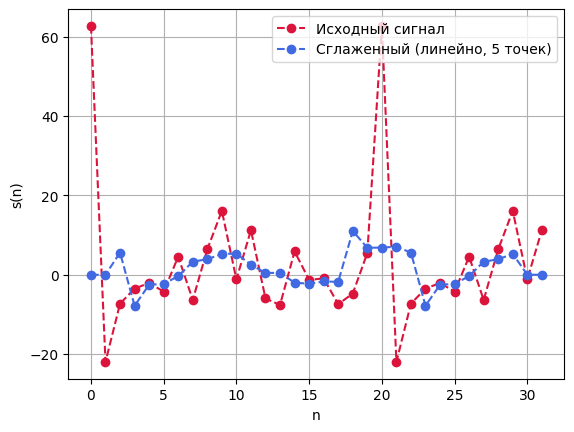

In [112]:
# Сглаженный сигнал (линейно 5 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_L_5, 'o--', color='royalblue', label='Сглаженный (линейно, 5 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

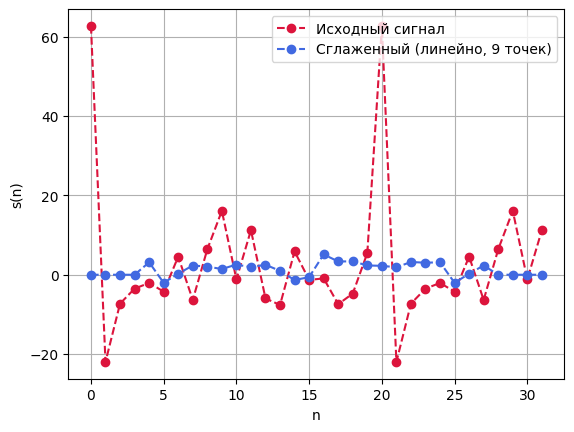

In [113]:
# Сглаженный сигнал (линейно 9 точек)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_L_9, 'o--', color='royalblue', label='Сглаженный (линейно, 9 точек)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [114]:
# Преобразование фурье для сглаженного сигнала (линейное)

F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

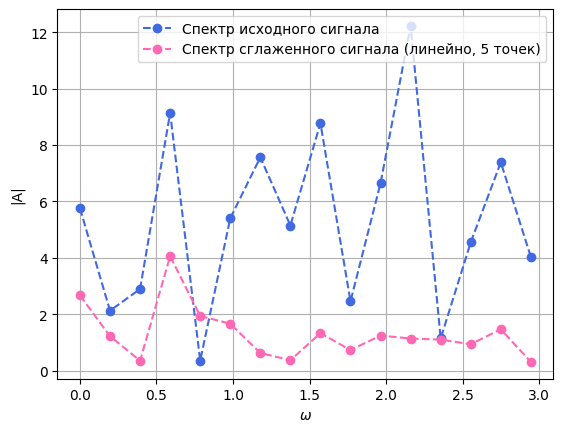

In [115]:
# Спектр сглаженного сигнала (линейный 5 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_L_5], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 5 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

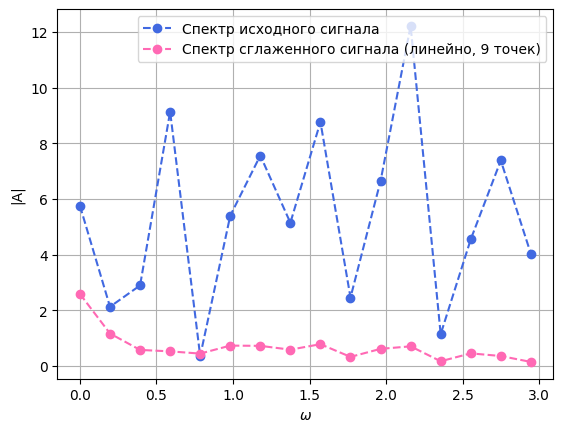

In [116]:
# Спектр сглаженного сигнала (линейный 9 точек)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_L_9], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 9 точек)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

In [117]:
# Дифференцирование первого порядка
def diff1(S):
  return [0] + [ (S[i+1] - S[i-1]) / (2*T) for i in range(1, len(S) - 1)] + [0]


In [118]:
Y_D_1 = diff1(S)

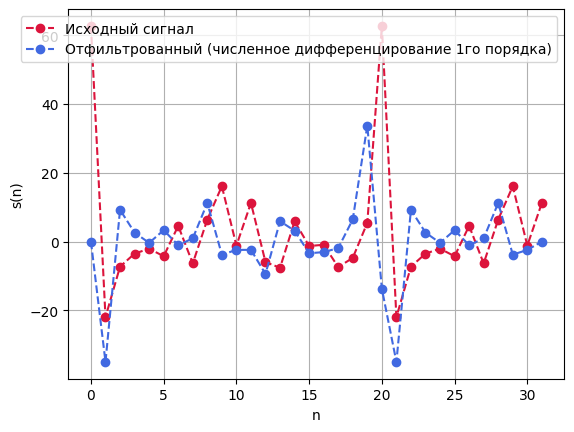

In [119]:
# Отфильтрованный сигнал (дифференцирование 1го порядка)
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_D_1, 'o--', color='royalblue', label='Отфильтрованный (численное дифференцирование 1го порядка)')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [120]:
# Преобразование фурье для дифференцированного сигнала

F_D_1 = np.fft.fft(Y_D_1, norm='forward')[:N // 2] * 2

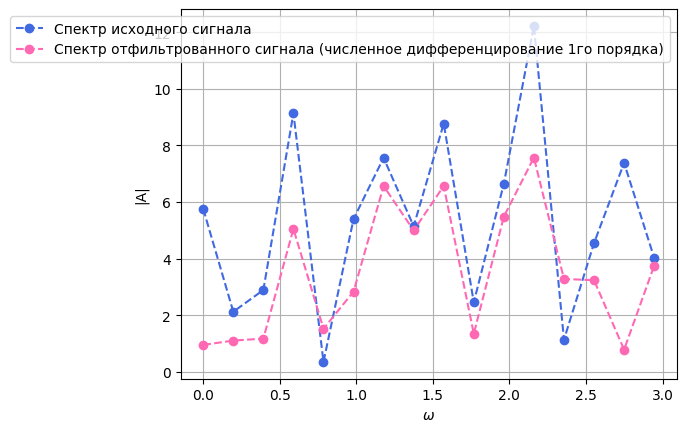

In [121]:
# Спектр отфильтрованного сигнала (численное дифференцирование 1го порядка)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_D_1], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (численное дифференцирование 1го порядка)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

In [122]:
# Интегрирование по формуле прямоугольников
def int_squares(S):
  Y = [0]
  for i in range(1, len(S)):
    Y.append(Y[-1] + (S[i-1] + S[i]) / 2)

  return Y


In [123]:
Y_int_squares = int_squares(S)

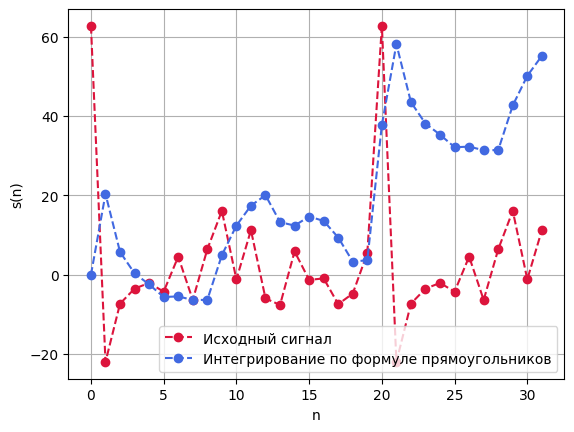

In [124]:
# Интегрирование по формуле прямоугольников
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_int_squares, 'o--', color='royalblue', label='Интегрирование по формуле прямоугольников')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [125]:
# Преобразование фурье для отфильтрованного сигнала (интегрирование по формуле прямоугольников)

F_int_squares = np.fft.fft(Y_int_squares, norm='forward')[:N // 2] * 2

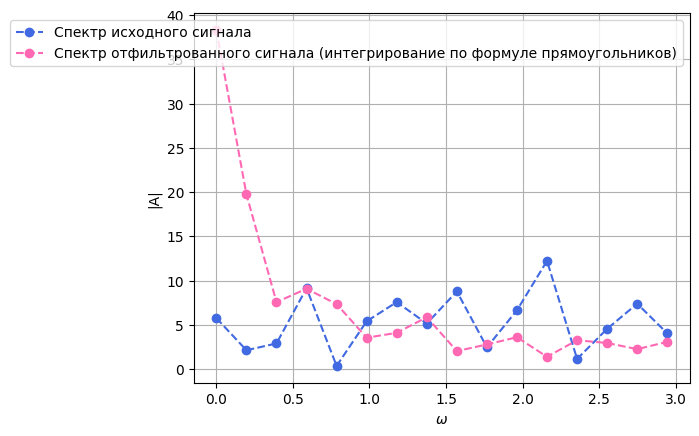

In [126]:
# Спектр отфильтрованного сигнала (интегрирование по формуле прямоугольников)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_int_squares], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (интегрирование по формуле прямоугольников)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

In [127]:
# Интегрирование по формуле трапеций
def int_trapezoid(S):
  Y = [0]
  for i in range(1, len(S)):
    Y.append(Y[-1] + (S[i-1] + S[i]) / (2*T))

  return Y


In [128]:
Y_int_trapezoid = int_trapezoid(S)

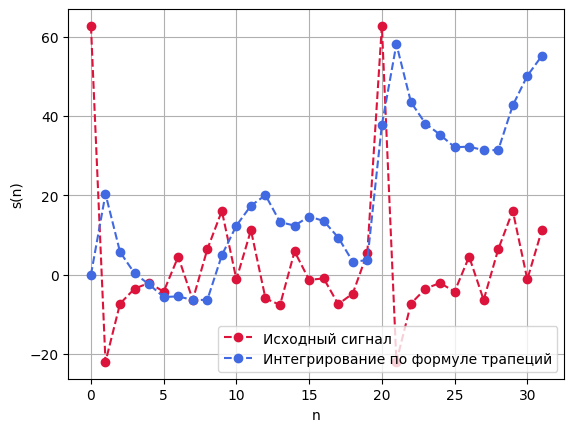

In [129]:
# Интегрирование по формуле трапеций
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_int_trapezoid, 'o--', color='royalblue', label='Интегрирование по формуле трапеций')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [130]:
# Преобразование фурье для отфильтрованного сигнала (интегрирование по формуле трапеций)

F_int_trapezoid = np.fft.fft(Y_int_trapezoid, norm='forward')[:N // 2] * 2

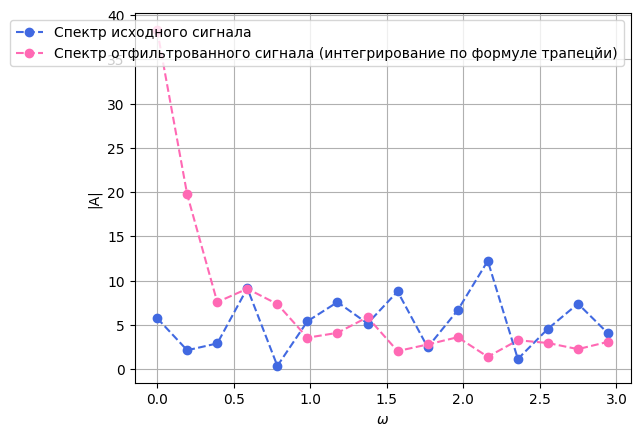

In [131]:
# Спектр отфильтрованного сигнала (интегрирование по формуле трапеций)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_int_trapezoid], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (интегрирование по формуле трапецйи)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!

In [132]:
# Интегрирование по формуле симпсона
def int_simpson(S):
  Y = [0]
  for i in range(1, len(S)-1):
    Y.append(Y[-1] + (S[i-1] + 4*S[i] + S[i+1]) / 3)

  return Y + [0]


In [133]:
Y_int_simpson = int_simpson(S)

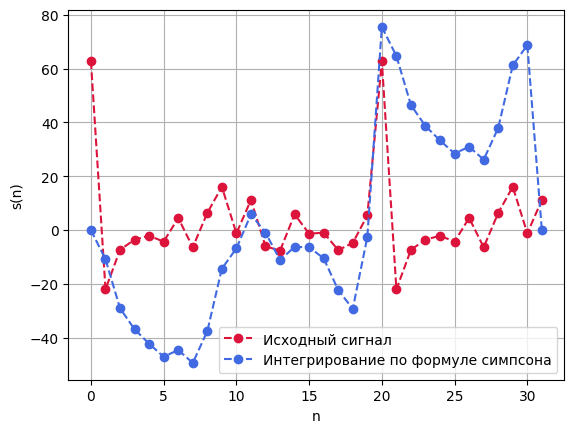

In [134]:
# Интегрирование по формуле симпсона
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал')
plt.plot(Xn, Y_int_simpson, 'o--', color='royalblue', label='Интегрирование по формуле симпсона')

plt.xlabel('n')
plt.ylabel('s(n)')
plt.grid()
plt.legend()
plt.show()
!

In [135]:
# Преобразование фурье для отфильтрованного сигнала (интегрирование по формуле симпсона)

F_int_simpson = np.fft.fft(Y_int_simpson, norm='forward')[:N // 2] * 2

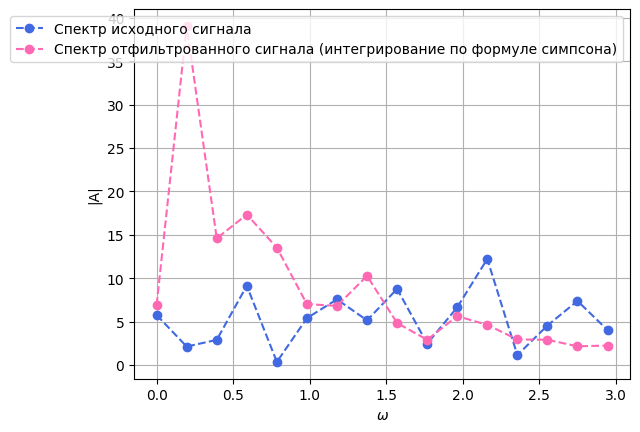

In [136]:
# Спектр отфильтрованного сигнала (интегрирование по формуле симпсона)
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала')
plt.plot(W, [abs(f) for f in F_int_simpson], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (интегрирование по формуле симпсона)')

plt.xlabel('$\omega$')
plt.ylabel('|A|')
plt.grid()
plt.legend()
plt.show()
!